# [LEGALST-123] Lab 04: Summary Statistics & Aggregating Data & Visualizations

In [1]:
from datascience import *
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


COMMENTED OUT PAST INTRODUCTION IN THIS CELL [click the Markdown cell to see]

<!-- # Introduction
In this lab, we aim to prepare students for prediction exercises in PSET 1 and PSET 2 by focusing on several key aspects of exploratory data analysis (EDA) and data manipulation using the Nashville police stops dataset. The objectives of this lab are as follows:

**Summary Statistics**:
We will compute and display summary statistics for relevant columns, particularly 'age' and 'year.' This includes calculating the mean and median for these columns and explaining their significance in the context of the dataset. Visualizations: We will create visualizations, including histograms for 'column1' and 'column2' columns, scatter plots to visualize relationships between specific variables, and box plots to display data distributions. Interpretations of these visualizations will be provided.

**Aggregating Data**:
We will introduce data aggregation using Python libraries like pandas. Techniques such as grouping data using the groupby function in pandas will be explored, along with examples of aggregating data to gain insights. We will also explain the use of pivot tables in pandas for data aggregation.

**Time Series Analysis**:
Introduce time series data analysis using a specific example from the dataset. We will analyze and visualize police stop trends over time, such as monthly or yearly trends, using time-specific data to demonstrate aggregation techniques. Line plots will be created to visualize time series data. -->


[Reorganized Version]
# Introduction
In this lab, we aim to prepare students for prediction exercises in PSET 1 and PSET 2 by focusing on several key aspects of exploratory data analysis (EDA) and data manipulation using the Nashville police stops dataset. The objectives of this lab are as follows:

**Summary Statistics**: 
We will introduce the basic skills to explore data, and review how to clean our data including how to handle the missing data. In this section, we will find summary statistics using built-in functions in Python libaries like pandas. 

**Aggregating Data**:
We will introduce data aggregation using Python libraries like pandas. Techniques such as grouping data using the groupby function in pandas will be explored, along with examples of aggregating data to gain insights. We will also explain the use of pivot tables in pandas for data aggregation. By exploring the aggregation, we will calculate our own summary statistics for relevant columns, particulary 'age' and 'year.' This includes calculating the mean and median for these columns and explaining their significance in the context of the dataset.

**Visualizations**: 
We will introduce different ways in which to understand the data with appropriate visualization tools, such as histograms, line plots, bar charts, and box plots. We will also specifically dive into *"Time Series Analysis"*, analyzing and visualizing police stops trends over time. By the end of the section, student should gain understanding of creating visualizations on discrete, continuous, and time-specific data. 

<br/>

<hr style="border: 1px solid #fdb515;" />

## Summary Statistics

### Part 1: Acquiring Data

To retrive the dataset, we will now load the CSV file we have into a `pandas.DataFrame` object and start exploring the data!
We will use `path` vairable to traverse to the directory where our CSV file is located and use `pd.read_csv` to read our view our files!

In [15]:
user = "suminpark" #insert your user name
path = "/Users/" + user +  "/Documents/GitHub/Modules/Legalst-123/labs/data/" #edit this later for the actual lab. 
# user = "fionaaaaa_mei" #insert your user name
# path = "/Users/" + user +  "/Documents/GitHub/Legalst-123/labs/data" #edit this later for the actual lab. 
stops = pd.read_csv(path + "/stops_sample.csv", index_col = 0)
stops.head()

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


### Part 2: Clean and Explore the Data

From loading our csv file and using `.head()`, we see that the fields include variables such as the longitude and latitude, the subject's race/age,  and the date and time of the offense.

Let's also check some basic information about this DataFrame using the `DataFrame.info` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)) and `DataFrame.describe` methods ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)).

In [16]:
#the describe function computes summary statistics for the entire dataframe 
#indexed by the columns so we havethe case number column and we have the cv column 
#and what our you know describefunction is returning is a data frame with indices as the summary statistics of the numerical columns in our data set
stops.describe()

,index,time,lat,lng,precinct,reporting_area,zone,subject_age
count,1.000000e+03,996.000000,940.000000,940.000000,887.000000,903.000000,887.000000,999.000000
mean,1.491263e+06,47195.963855,36.146446,-86.762884,4.401353,7770.545958,460.828636,36.811812
std,8.823683e+05,24555.357937,0.115117,0.376956,2.248430,12490.193085,225.863415,13.748406
min,1.425000e+03,60.000000,33.522888,-97.407823,1.000000,889.000000,111.000000,16.000000
25%,7.216352e+05,30660.000000,36.109700,-86.789033,2.000000,3020.000000,227.000000,26.000000
50%,1.456574e+06,48810.000000,36.154908,-86.751799,4.000000,5501.000000,425.000000,34.000000
75%,2.282808e+06,67755.000000,36.190809,-86.703740,6.000000,8815.000000,621.000000,46.000000
max,3.091709e+06,86280.000000,36.373107,-84.751067,8.000000,95020.000000,835.000000,82.000000


In [17]:
# df.info() displays
# name and type of each column, 
# number of non-null entries, and 
# size of dataframe
stops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           1000 non-null   int64  
 1   raw_row_number                  1000 non-null   object 
 2   date                            1000 non-null   object 
 3   time                            996 non-null    float64
 4   location                        1000 non-null   object 
 5   lat                             940 non-null    float64
 6   lng                             940 non-null    float64
 7   precinct                        887 non-null    float64
 8   reporting_area                  903 non-null    float64
 9   zone                            887 non-null    float64
 10  subject_age                     999 non-null    float64
 11  subject_race                    1000 non-null   object 
 12  subject_sex                     998

Note that each columns sometimes different count of non-null counts. For instance, `raw_row_number` column has 1000 non-null counts while `zone` has only 887 non-null counts. This is because the `.info()` method only counts non-null entries. 

Other methods to check null values are using the `.isna()` or `.isnull()`, where you can apply them to the column Series itself or use `.sum()` after to check all columns null values.

In [18]:
stops.isna().sum()

index                               0
raw_row_number                      0
date                                0
time                                4
location                            0
lat                                60
lng                                60
precinct                          113
reporting_area                     97
zone                              113
subject_age                         1
subject_race                        0
subject_sex                         2
officer_id_hash                     0
type                                0
violation                           2
arrest_made                         0
citation_issued                     0
warning_issued                      0
outcome                             1
contraband_found                  960
contraband_drugs                  960
contraband_weapons                960
frisk_performed                     0
search_conducted                    0
search_person                       0
search_vehic

We can see that there are only some columns with only a few null-values, but certain columns (`contraband_found`, `contraband_drugs`, etc) with a lot more null-values. We want to investigate this further, but first let's drop some unnessary columns so we can explore better.

We won't be needing any columns with starting with "raw_" so let's drop all these columns using `.drop` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)).

#### **Question 1.1**

In [19]:
# You do not have to understand the code for raw_columns! It stores a list of columns names that containes "raw_"
raw_columns = [col for col in stops.columns if 'raw_' in col]

# YOUR CODE HERE
# stops = ... 

stops = stops.drop(raw_columns, axis=1) #SOLUTION

Now, let's look at null values of `stops` again! For convenience, we will look at columns that has
 null-values.

In [20]:
stops.isna().sum()[stops.isna().sum() > 1]

time                            4
lat                            60
lng                            60
precinct                      113
reporting_area                 97
zone                          113
subject_sex                     2
violation                       2
contraband_found              960
contraband_drugs              960
contraband_weapons            960
search_basis                  960
reason_for_stop                 2
vehicle_registration_state     13
notes                         828
dtype: int64

#### **Handling Missing Values** 

It is common to encounter missing values in real-life data. Incomplete data can bias and/or reduce the "accuracy" of the results of your machine learning model. There many different strategies to handle missing values including:  
* Deleting the entire row if the a row has many missing values using `.dropna() `([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html))
* Deleting the entire column if the column has many missing values using `.dropna() ` with `axis=1`
* Replacing the missing values with an aribtary value 
* Replacing the missing values with mean/ median / mode using `.fillna()` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html))
* Replacing the missing values with 0

Some missing values explain the process of the data collection or the pattern of the population itself. Then, it would be useful use this "missingness" as a feature!

For instance, let's look at our `"notes"` column with 828 non-null values. If you run the code below, you would notice there are some pattern within `"notes" `itself and perhaps then, the missing values (having no notes) might not due to randomeness and may have some association/relationship with other variables within the dataset. 

In [21]:
stops["notes"][stops["notes"].isna() == False] # The code checks non-null values within "notes" column 

1                                        tail light out
5                                         RAN STOP SIGN
26                         PASSENGER SIDE HEADLIGHT OUT
28                             SEATBELT WORN IMPROPERLY
32                                                 tags
                             ...                       
979                     SPEEDING --MPH IN --MPH - PACED
982                                      HEAD LIGHT OUT
985                      passenger side tail light out.
986    CARELESS DRIVING\nCUT OFF VEHICLE\nMOVE OVER LAW
994                               headlights on in rain
Name: notes, Length: 172, dtype: object

We know we don't want to delete the entire column or replace the missing values `"notes"` because it may be important feature. We could also understand that we don't want to perform row-deletion on null-values on `"notes"` looking at our output. Run the cell below and see how many rows are left after we delete all the rows with null-values within the `"notes"` column!

Note that `.shape`([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)) returns the tuple representing the dimensionality of the DataFrame.

In [22]:
stops.dropna(subset = ["notes"]).shape

(172, 30)

Our 1000-row DataFrame has reduced to 172 rows. Imagine if we were to delete all rows with any null values. This will reduce our rows significantly (994 to be exact in this case), affecting our ability to analyze the data.  **Therefore, we do not want to delete all rows or columns of our null-values but to make appropriate decisions to handle each missing data accordingly**. 

#### **Question 1.2** 
Given that we did the preliminary work to find appropriate way of handling the missing values, we will drop the rows with *any* null values EXCEPT for the columns` "contraband_found"`, `"contraband_drugs"`, `"contraband_weapons"`, `"search_basis"`, and `"notes"`.

 For this question, first assign `necessary_cols` to all columns in the table other than these five columns listed above. Then, drop the rows with null-values using `.dropna()`  and update our `stops` DataFrame. 

 Hint 1: If you want to find the columns names, you can choose to use `.columns`!
 
 Hint 2: Take a look at the parameters for `.dropna()`! 

In [23]:
# YOUR CODE HERE 
# necessary_cols = ...
# stops = ... 


necessary_cols = stops.columns.drop(["contraband_found", "contraband_drugs", "contraband_weapons", "search_basis", "notes"]) #SOLUTION 
stops = stops.dropna(subset=necessary_cols,axis=0) #SOLUTION 

Let's now re-look at how the new `stops`'s `info()` and `describe()`!

In [24]:
# YOUR CODE HERE
stops.info() #SOLUTION

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       833 non-null    int64  
 1   date                        833 non-null    object 
 2   time                        833 non-null    float64
 3   location                    833 non-null    object 
 4   lat                         833 non-null    float64
 5   lng                         833 non-null    float64
 6   precinct                    833 non-null    float64
 7   reporting_area              833 non-null    float64
 8   zone                        833 non-null    float64
 9   subject_age                 833 non-null    float64
 10  subject_race                833 non-null    object 
 11  subject_sex                 833 non-null    object 
 12  officer_id_hash             833 non-null    object 
 13  type                        833 non

In [25]:
# YOUR CODE HERE
stops.describe() # SOLUTION 

,index,time,lat,lng,precinct,reporting_area,zone,subject_age
count,8.330000e+02,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,1.490302e+06,46950.180072,36.148303,-86.750729,4.428571,7172.012005,463.638655,36.708283
std,8.842343e+05,24713.624164,0.111620,0.079303,2.250534,11071.543165,226.009031,13.746246
min,1.425000e+03,60.000000,33.522888,-87.673566,1.000000,889.000000,111.000000,16.000000
25%,7.152040e+05,30600.000000,36.110928,-86.788732,2.000000,3019.000000,227.000000,26.000000
50%,1.449810e+06,48120.000000,36.155042,-86.751992,4.000000,5405.000000,425.000000,33.000000
75%,2.287868e+06,68040.000000,36.188952,-86.705978,6.000000,8810.000000,621.000000,46.000000
max,3.082012e+06,86280.000000,36.373107,-86.588551,8.000000,92960.000000,835.000000,82.000000


#### **Question 1.3** 
According to your outputs above of `stop`, what is the median and mean for `"precinct"`,` "zone" `and `"subject_age"`? You can round it to the nearest hundredth decimal place. 

Hint: 50% percentile is same as the median

_YOUR ANSWER HERE_

In [26]:
#SOLUTION (made in code format to make it noticable)

#precinct's mean = 4.43
#precinct's median = 4.00

#zone's mean = 463.64
#zone's median = 425.00

#subject_age's mean = 36.71
#subject_age's median = 33.00


In [28]:
# import os
# os.makedirs(path, exist_ok=True) # with the path from above, we are going to store our csv files we have manipulated
# stops.to_csv(path + "stops_cleaned.csv", sep=',', index=False, encoding='utf-8') # Run this ONCE so there is no same csv files

<br/>

<hr style="border: 1px solid #fdb515;" />

## Data Aggregation

You may have noticed that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we can access more information about the dataset using aggregation functions!

First of all, the function value_counts() can be used to access the number of each category for each variable. Let's look at `"search_conducted"` column to look at how many search was conducted by the police in Nashville. 

In [34]:
stops[["search_conducted"]].value_counts()

search_conducted
False               797
True                 36
dtype: int64

Next, let's explore the use of the `groupby()` function ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)). You might be familiar Data C8's [group method](https://www.data8.org/fa23/reference/), but the `groupby()` function from pandas is a bit more complex! 

The below cells is an example of how to use the groupby function to generate summary statistics of variables in the dataset. In this case we are finding statistical summary of the variable `"subject_age"` of each subject race/ethnicity within the `"subject_race"`

In [35]:
# since we only want to look at the subject_age and subject_race, let's start with extracting these two columns out of the dataset. 
stop = stops[["subject_age", "subject_race"]] 
stop.groupby(['subject_race']).mean()

,subject_age
subject_race,
asian/pacific islander,36.823529
black,35.544669
hispanic,29.888889
other,31.600000
unknown,37.545455
white,38.485294


In [36]:
# Now if we want to look at the median instead of mean, we simply change the aggregation at the end. 
stop.groupby(['subject_race']).median()

,subject_age
subject_race,
asian/pacific islander,33.0
black,33.0
hispanic,30.0
other,33.0
unknown,40.0
white,34.5


In [37]:
# Here is another example with max
stop.groupby(['subject_race']).max()

,subject_age
subject_race,
asian/pacific islander,58.0
black,73.0
hispanic,49.0
other,35.0
unknown,47.0
white,82.0


#### **Question 2** 

In the cell below, set `answer2` equal to a DataFrame corresponding to the **average** subject age and **total count** of search conducted by the police on each different types of violation. Your answer doesn't have to be in one line. 


 Hint 1: You should be using the `"search_conducted"`, `"violation"`, `"subject_age"` columns

 Hint 2: Looking at above example where the groupby function grouped each row by unique values within `"subject race"`', what column should I group by in order for rows to output different type of violation? 

 Hint 3: You are not meant to find the average of subject age and total count for the search conducted all at on group by function. Try using the `.join `function with the optional parameter `on = ....` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html))

<!--
BEGIN QUESTION
name: q1
-->

In [38]:
# YOUR CODE HERE 
# ... 
# answer2 = ... 
# answer2


answer2 = stops[['search_conducted','violation']].groupby('violation').count() #SOLUTION 
answer2 = answer2.join(stops[["violation", "subject_age"]].groupby("violation").mean(), on = "violation") #SOLUTION 
answer2 

,search_conducted,subject_age
violation,,
investigative stop,21,34.666667
moving traffic violation,408,36.514706
parking violation,1,29.000000
registration,44,37.318182
safety violation,53,36.924528
seatbelt violation,28,35.857143
vehicle equipment violation,278,37.122302


<br/>

<hr style="border: 1px solid #fdb515;" />

## Visualizations

Now that we found more information about the Nashville Police stops dataset, let's use visualization to explore and analyze! Visualization is a crucial component of EDA because it allows for the intuitive understanding and interpretation of data through graphical representations. EDA involves examining datasets to summarize their main characteristics, often using statistical graphics and plots. In this section we will introduce to five different visualizations: _Histograms, Bar charts, Scatter plots, Box plots, and lastly Time Series_.

### Part 1:  Histograms

A histogram is a graphical representation used to depict the distribution of a dataset. It is an estimate of the probability distribution of a continuous variable. The x-axis of a histogram represents the variable being measured, while the y-axis represents the frequency of the data points. Histograms provide a visual interpretation of numerical data by showing the number of data points that lie within a range of values, which can be useful for understanding the distribution, central tendency, and spread of data.

For our first example below, we will demonstrate creating a histogram depicting the distribution of subject age for police's stops. 

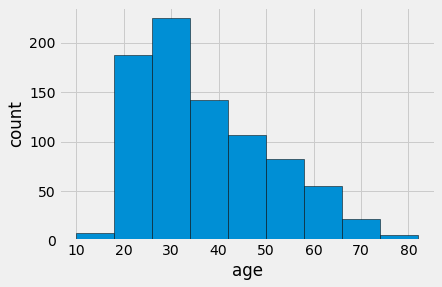

In [39]:
# Assuming that we have imported matplotlib (a library you have used in Data C8 too!) above, 
# we first need to specify the number of bins or bin width and range of values of the histogram
num_bins = np.arange(10, 90, 8)
hist_range = (10, 90) 

plt.hist(stops['subject_age'], bins=num_bins, range=hist_range, edgecolor='k')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

From the graph above and knowing our bin is the width of 8, we can get the information that the age interval (36, 44) has the most number of subjects. 

#### **Question 3.1**
Let's now try to make an overlaid histogram ([documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) comparing the age distribution between distinct values in` "subject_sex"`. First, find the distinct values within ` "subject_sex"`. Then, make a copy of the table that only corresponds to that distinct value and create the histogram. You may set all the optional parameters same as above for now (bins, range, and edgecolor).

Hint: This problem requires you to take manipulate the table before making any visualizations! Try making new variables and setting to the new copy of the tables for convience. 

Hint: For overlaid histogram, it would be useful to use parameters `label` for using multiple datasets and `alpha` for changing transparency of the histogram bins.

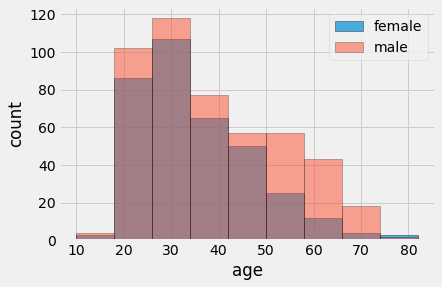

In [40]:
# YOUR CODE HERE
# ... 
# ... 
# ... 

# num_bins = np.arange(10, 90, 8)
# hist_range = (10, 90) 


# plt.hist(...) 
# plt.hist(...) 
# plt.legend(loc= 'upper right')
# plt.xlabel('age')
# plt.ylabel('count')
# plt.show()

stops["subject_sex"].unique() #SOLUTION
female_stops = stops[stops["subject_sex"] == "female"] #SOLUTION 
male_stops = stops[stops["subject_sex"] == "male"] #SOLUTION 


num_bins = np.arange(10, 90, 8)
hist_range = (10, 90) 


plt.hist(female_stops['subject_age'], label = "female", alpha = 0.7, bins=num_bins, range=hist_range, edgecolor='k') #SOLUTION 
plt.hist(male_stops['subject_age'], label = "male", alpha = 0.5,  bins=num_bins, range=hist_range, edgecolor='k') #SOLUTOIN 
plt.legend(loc= 'upper right')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

#### **Question 3.1.2** 
What differences/or similarities do you see between these two groups regarding their police stops looking at the histograms above? Please describe at least one.

_YOUR ANSWER HERE_

In [41]:
#SOLUTION (made in code format to make it noticable)

# The answer may vary. There seem to be an overall more male police stops than female. 

### Part 2: Bar Charts

Bar chart (graph) is a graphical representation used to compare different categories of data with rectangular bars. Unlike histograms, which display continuous data and have bins, bar charts depict discrete data or distinct categories. The x-axis represents the specific categories being compared, while the y-axis represents a measured value.

Let's look at` "violation"` column and see how many police stops have been categorized as for each category of the violation. Look at the code below and run the code! What does the first line help us do? Is there a better way to format the x-axis so it doesn't look clutttered? 

<BarContainer object of 7 artists>

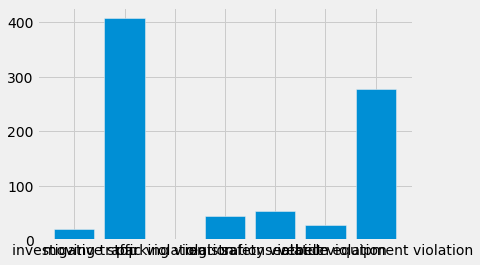

In [42]:
violation_count = stops.groupby("violation").count() # this line helps us find counts of each distinct values within violation column
plt.bar(violation_count.index, height =violation_count["subject_age"])

You can easily fix this problem by plotting the bar graph horizontally! You can call `.barh` instead of `.bar`. However, one thing to remember is that `.bar `requires the positional argument `'height'` while `.barh` requires positional argument `'width'`.

#### **Question 3.2** 
Create a horizontal bar graph that compare different categorizes of` "violation"` counts. The code should look very similar to the one above. 

<BarContainer object of 7 artists>

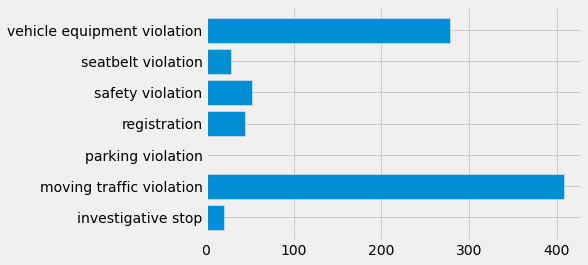

In [43]:
# YOUR CODE HERE

violatoin_count = stops.groupby("violation").count() #SOLUTION 
plt.barh(violation_count.index, width =violation_count["subject_age"]) #SOLUTION

### Part 3. Scatter Plots

Scatter plot is a type of data visualization that uses individual data points to represent the values of two variable. The position of each point is determined by its horizontal (x-axis) and vertical (y-axis) values, making it possible to observe relationships or patterns between the two variables. Scatter plots are particularly useful for studying the correlation or association between two numerical variables.

Let's create a scatter plot looking at correlation between the `"zone" `data values and `"precinct"` data values. 

Text(0, 0.5, 'Precinct #')

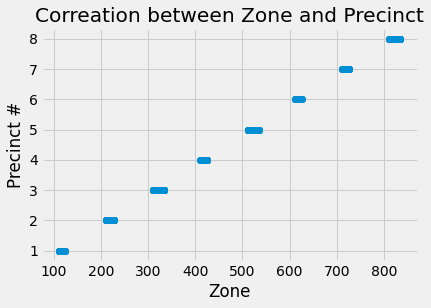

In [44]:
plt.scatter( "zone", "precinct", data = stops)
plt.title('Correation between Zone and Precinct')
plt.xlabel('Zone')
plt.ylabel('Precinct #')

#### **Questoin 3.3**

Looking at the sactter plot above, is there a high or low correlation betwen `"zone"` and `"precinct"`? Is it a positive or negative correlation? Explain your answer with regards to the hypothetical context if you are unsure.

_YOUR ANSWER HERE_

In [45]:
#SOLUTION (made in code format to make it noticable)

#There is a positive high correlation between "zone" and "precinct". 
#The nature of the data might inherently involve a strong relationship between zones and precincts. 
#For instance, each precinct might correspond to a specific zone, or there could be a systematic way in which zones and precincts were allocated.

In [46]:
# COMMENTED OUT FIONA's WORK BUT YOU CAN CHOOSE WHICH EVER SCATTER PLOT WOULD LOOK BETTER!

# SCATTER CODE
# import seaborn as sns
# import matplotlib.pyplot as plt
# stops_scatter = stops[stops['lat'] > 36]
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=stops_scatter, x='lat', y='precinct', color='blue', marker='o', label='Data Points')
# plt.title('correation between Latitude and Precinct')
# plt.xlabel('Latitude')
# plt.ylabel('Y-axis')

### Part 4. Box Plots

A box plot, also known as a whisker plot or box-and-whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: the minimum, first quartile (Q1), median (second quartile, Q2), third quartile (Q3), and the maximum. Box plots provide a visual summary of key statistics from the data and are particularly useful for comparing distributions across different groups or categories. They offer insights into the central tendency, variability, and skewness of the data, as well as the presence of potential outliers.

**Box (Rectangle)**: The box represents the interquartile range (IQR), which encompasses the middle 50% of the data. The bottom and top edges of the box mark the first quartile (25th percentile, Q1) and the third quartile (75th percentile, Q3), respectively. The line inside the box represents the median (50th percentile).

**Whiskers**: The whiskers extend from the box and represent the range within which most of the data falls. Data points within 1.5 times the IQR from the lower or upper quartiles are considered within the whiskers' range.

**Individual Points**: Any data points that fall outside the whiskers' range are plotted individually as points. These are potential outliers and are drawn as "white dots."


Let's look at example down below, looking at the age distribution of all the subject races.

/var/folders/qj/1mxrck1x3fg7s25g3g04md640000gn/T/ipykernel_44986/3065766927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=stops, x='subject_race', y='subject_age', palette='Set2')


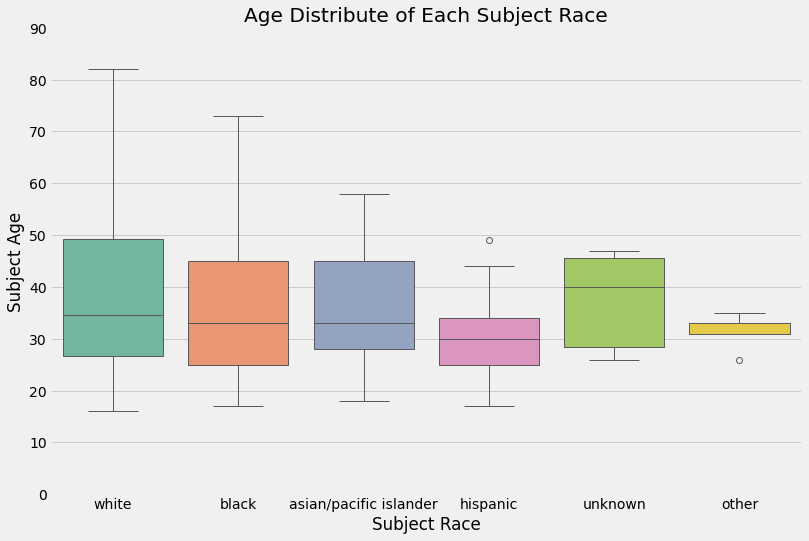

In [47]:
# For this plot type we will look at the age distribution of all the subject races 

# First, we want to import seaborn because the library will be helpful in the future!
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=stops, x='subject_race', y='subject_age', palette='Set2')
plt.title('Age Distribute of Each Subject Race')
plt.xlabel('Subject Race')
plt.ylabel('Subject Age')
plt.ylim(0, 90)
plt.show()


Using box plot from seaborn ([documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)) we can get a sense of statistics of the subject's age for each race/ethnicity categories. Recall that we did something very similar in our data aggregation section! This just go and shows that visualizations can a be a great tool for us to understand main characteristics of certain data just like complex manipulation.

#### **Question 3.4** 
Understanding the features of box-and-whisker plot, write down at least two interest observation you made from this visualization above. 

_YOUR ANSWER HERE_

In [48]:
#SOLUTION (made in code format to make it noticable)



### Part 5: Time Series Analysis

For the last part of the lab, we will introduce you to Time Series Analysis! Time Series Analysis is a method used to examine data points collected sequentially over time. These data points, plotted on a graph with time on the horizontal (x-axis) and the variable of interest on the vertical (y-axis), show how a particular variable evolves over time. By studying past patterns in this sequence, time series analysis can help predict future values. It's especially useful for understanding trends, cycles, or any recurring patterns in data over a time period.

Before going straight into time series analysis, we need to manipulate data in order for the visualization to work. In this particular section, we will learn how to do 
1. Convert column to DateTime
2. Using DateTime Library
2. Reindexing

#### **Question 3.5**

The [datetime](https://docs.python.org/3/library/datetime.html) module supplies classes for manipulating dates and times. Using pandas function, `pd.to_datetime` ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)), create a new column called `"datetime" `to `time_series_df` using the values from `"date" ` column. 

In [101]:
# YOUR CODE HERE
# time_series_df = stops.copy()
#  time_series_df['date'] = ...
# time_series_df['date'][0]


#SOLUTION 
time_series_df = stops.copy()
time_series_df['datetime'] = pd.to_datetime(time_series_df['date'], format='%Y-%m-%d')
time_series_df['datetime'][0] #taking the first itme out from the "date" Series, the object should be a timestamp.

Timestamp('2010-04-18 00:00:00')

Let's try to understand datetime library a bit better! Run the following line to see what it outputs!

In [102]:
print("For the date,", time_series_df['datetime'][0], "the year is", time_series_df['datetime'][0].year, "and the month is", time_series_df['datetime'][0].month, ".")

For the date, 2010-04-18 00:00:00 the year is 2010 and the month is 4 .


As you can see datetime library has some types to work with! Now let's look at `strftime()` method, shortened for "string format time." The primary purpose of this method is to format datetime objects as strings. By using various format codes, you can represent the date and time in many different ways.

Some common format codes used with strftime():
* %Y: Year with century (e.g., "2023")
* %m: Month as a zero-padded decimal (e.g., "01" for January)
* %d: Day of the month as a zero-padded decimal (e.g., "09" for the 9th of the month)
* %B: Full month name (e.g., "January")
* %b: Shortened month name (e.g., "Jan")

Run this code below to see how we can use `strftime()`.

In [103]:
time_series_df['datetime'][0].strftime('%b %Y')

'Apr 2010'

#### **Question 3.6** 

Using `datetime` column, apply `strftime()` to create a new column `"month Year" `in `time_series_df`. Note that it would be difficult to use [.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) function from pandas so try using list comprehension or for loop! 

**Hint**: When you are using a for loop, you want to use `.index` not np.arange like in Data C8 as some of our indexes has been deleted due to our data cleaning process and will lead to `KeyError`

# YOUR CODE HERE
...

In [132]:
time_series_df["month Year"] = [time_series_df['datetime'][i].strftime('%b %Y') for i in time_series_df.index] #Solution
time_series_df["month Year"]

0      Apr 2010
1      Jan 2015
2      Jan 2015
3      May 2013
4      Sep 2010
         ...   
995    Jul 2012
996    Jan 2012
997    Aug 2016
998    Aug 2011
999    Sep 2012
Name: month Year, Length: 833, dtype: object

#### **Question 3.7** 

Now that we manipulated our `"month Year"` columns, we want to aggregate it by the column to see how many search was conducted each month year. Assing this to `grouped_count`. Make sure to reindex so `"month Year"` is no longer the index but a column, for plotting purposes.

Hint: [.reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) would be helpful! 

In [109]:
# YOUR CODE HERE 
# grouped_count = ....
# grouped_count

#SOLUTION 
grouped_count = time_series_df.groupby(["month Year"]).agg("count")
grouped_count = grouped_count.reset_index()
grouped_count

,month Year,index,date,time,location,lat,lng,precinct,reporting_area,zone,...,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes,datetime
0,Apr 2010,10,10,10,10,10,10,10,10,10,...,1,10,10,10,10,1,10,10,1,10
1,Apr 2011,8,8,8,8,8,8,8,8,8,...,1,8,8,8,8,1,8,8,2,8
2,Apr 2012,10,10,10,10,10,10,10,10,10,...,1,10,10,10,10,1,10,10,1,10
3,Apr 2013,14,14,14,14,14,14,14,14,14,...,0,14,14,14,14,0,14,14,2,14
4,Apr 2014,10,10,10,10,10,10,10,10,10,...,0,10,10,10,10,0,10,10,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Sep 2014,9,9,9,9,9,9,9,9,9,...,0,9,9,9,9,0,9,9,2,9
107,Sep 2015,8,8,8,8,8,8,8,8,8,...,0,8,8,8,8,0,8,8,2,8
108,Sep 2016,3,3,3,3,3,3,3,3,3,...,0,3,3,3,3,0,3,3,1,3
109,Sep 2017,7,7,7,7,7,7,7,7,7,...,0,7,7,7,7,0,7,7,0,7


With everything set, let's plot a time series!

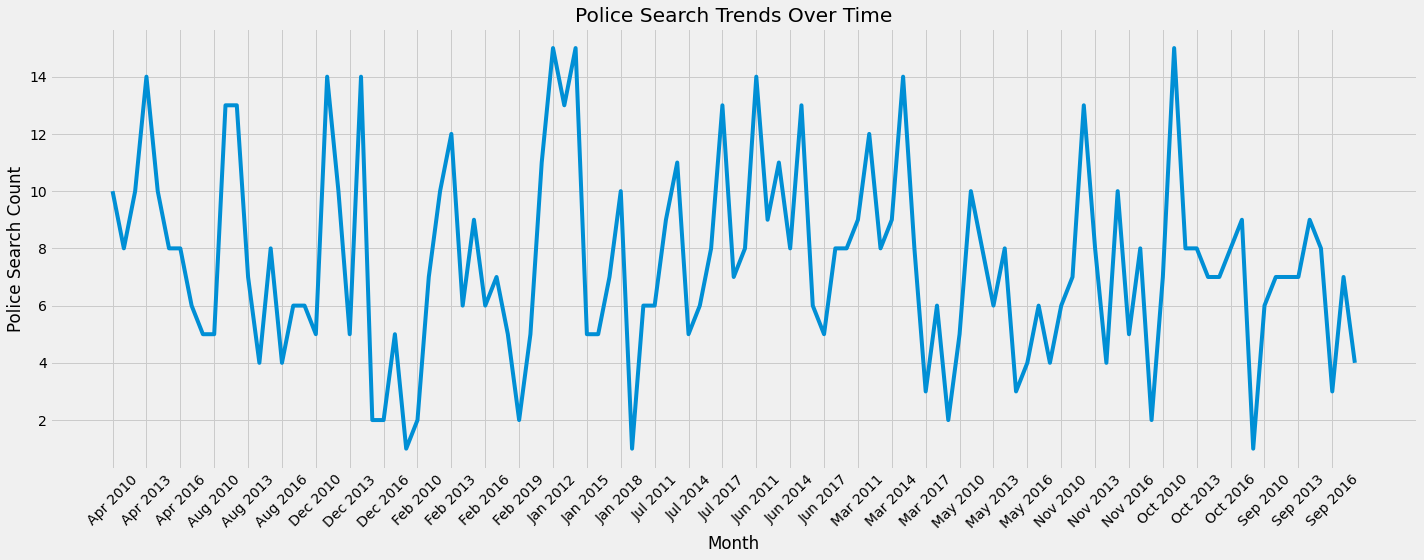

In [124]:
# Create a line plot to visualize yearly trends
plt.figure(figsize=(20, 8))
# You should be using grouped_count we established above.
# plt.plot(... , ... ) 
plt.plot(grouped_count["month Year"], grouped_count["search_conducted"]) #SOlUTION 

plt.xticks(grouped_count["month Year"][::3],rotation=45) #displaying only every third xtick. 
plt.xlabel('Month')
plt.ylabel('Police Search Count')
plt.title('Police Search Trends Over Time')
 
plt.tight_layout()  
plt.show()

It's your turn to practice and create your time-series analysis! 

#### **Question 3.8**
Let's say we want to only examine how moving traffic violation evolves over time. Using the example above, plot a time series where we aggregate the data by monthly frequency. 

Hint 1: The aggregating and visualization method should be very similar to above!

Hint 2: If you are stuck on where you can find the information regrading moving traffic violation, refer to question 2! 

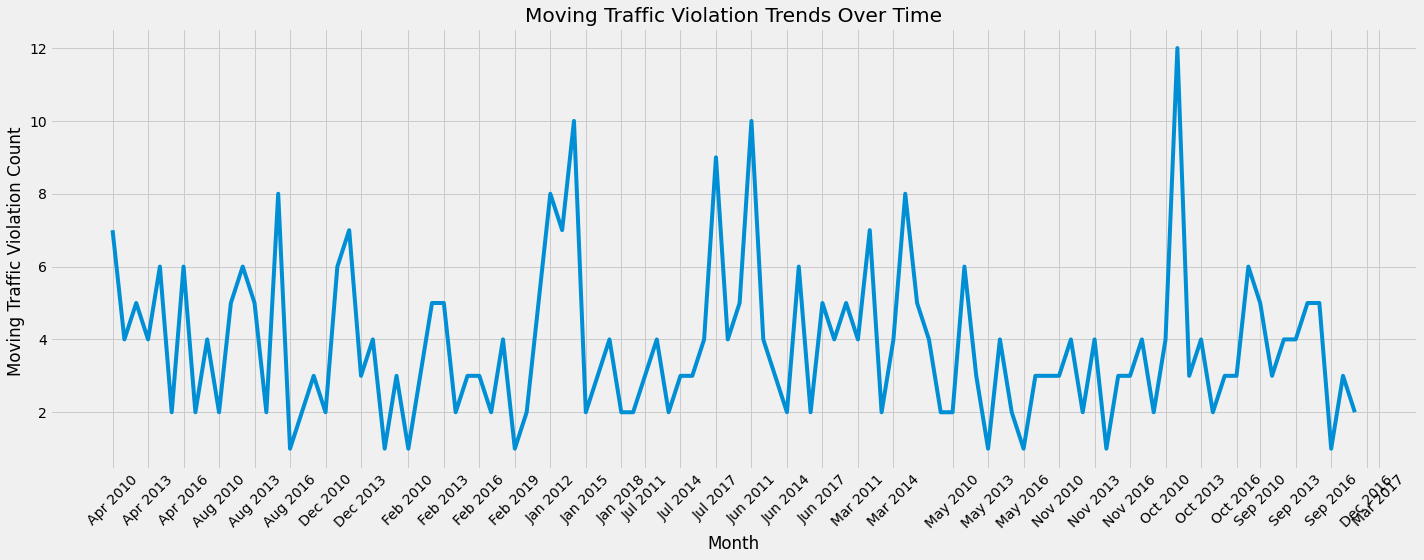

In [127]:
# YOUR CODE HERE 
# violation_df = ... 
# violation_monthly = ... 
# ...

# SOLUTION
violation_df = time_series_df[time_series_df["violation"] == "moving traffic violation"]
violation_monthly = violation_df.groupby("month Year").agg("count").reset_index()

plt.figure(figsize=(20, 8))
plt.plot(violation_monthly["month Year"], violation_monthly["violation"]) #setting index, TimeStamp as x-axis and 

plt.xticks(grouped_count["month Year"][::3],rotation=45) #displaying only every third xtick. 
plt.xlabel('Month')
plt.ylabel('Moving Traffic Violation Count ')
plt.title('Moving Traffic Violation Trends Over Time')

plt.tight_layout()
plt.show()

We can also draw multiple time-series and compare them together. To do this, `.pivot_table `([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table)) can be very helpful! Let's look at the code below and run the following cells to see how we created this multi-variate time series analysis. For this time series, let's look at changes through out the year.

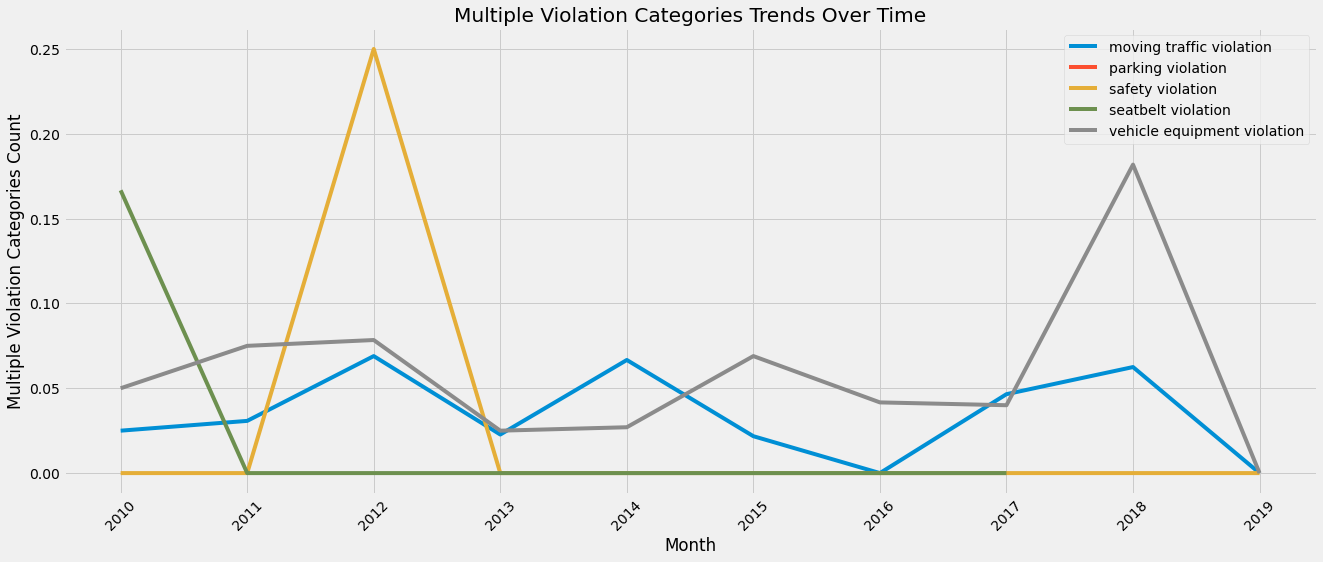

In [185]:
# This step is similar to above where we are working with date and time above
multiple_violation = stops.copy()
multiple_violation['datetime'] = pd.to_datetime(multiple_violation["date"])
multiple_violation['Year'] = [multiple_violation['datetime'][i].strftime('%Y') for i in multiple_violation.index]


multiple_violation_year = multiple_violation.pivot_table(index = "Year", columns= "violation", values="search_conducted") #here, look closely to the parameters!
multiple_violation_year = multiple_violation_year.drop(["investigative stop", "registration"], axis=1)
plt.figure(figsize=(20, 8))
for column in multiple_violation_year.columns: #going through all columns, which is violation with our pivot manipulation above!
    plt.plot(multiple_violation_year.index, multiple_violation_year[column], label = column) 

plt.legend(loc= 'upper right')
plt.xticks(multiple_violation_year.index,rotation=45)
plt.xlabel('Month')
plt.ylabel('Multiple Violation Categories Count')
plt.title('Multiple Violation Categories Trends Over Time')
plt.show()

#### **Question 3.9**
Last practice! For this question, let's examine the changes in total count of search conducated over time (Monthly frequency) among different groups of `"subject_race"`. We sepcifically want to look at three different groups, "`black`", "`white`", and "`hispanic`" groups. 

Hint 1: Just like the example above, we want to use the `.pivot_table `method. 

Hint 2: We want to use filter out the DataFrame before the for loop so that we are only examining three categories! 

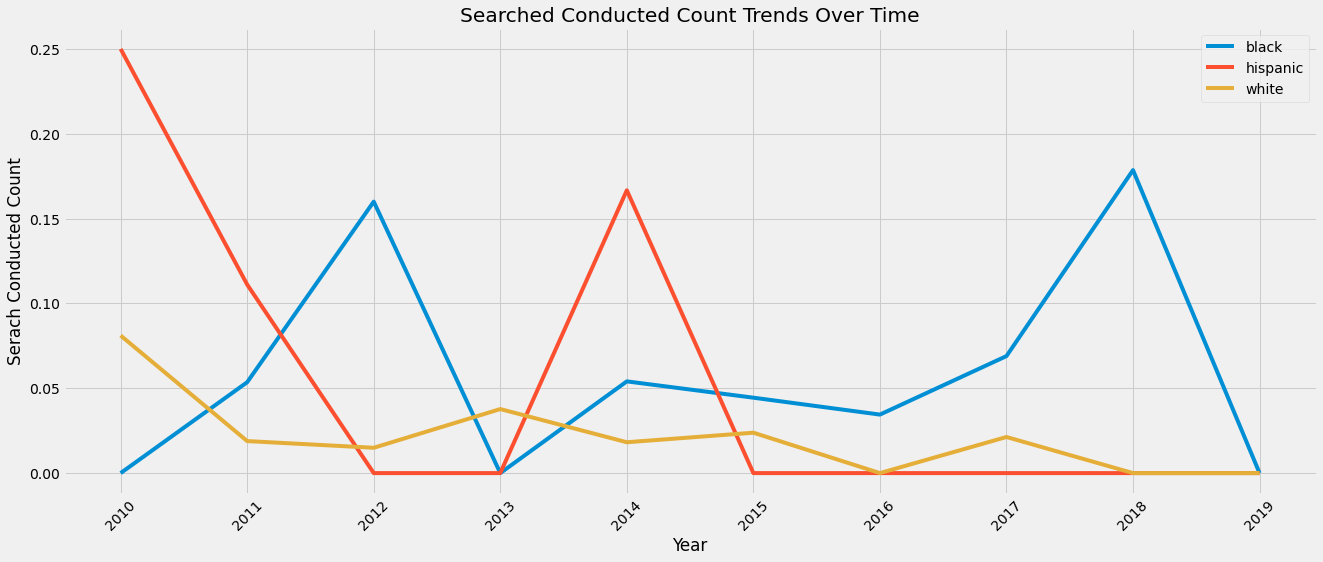

In [180]:
# YOUR CODE HERE

#Solution
race_df = stops.copy() 
race_df['datetime'] = pd.to_datetime(race_df["date"])
race_df['Year'] = [multiple_violation['datetime'][i].strftime('%Y') for i in multiple_violation.index]

race_df_year = race_df.pivot_table(index = "Year", columns= "subject_race", values = "search_conducted") #here, look closely to the parameters!
race_df_year = race_df_year.drop(["asian/pacific islander", "other", "unknown"], axis=1)

plt.figure(figsize=(20, 8))
for column in race_df_year.columns: #going through all columns within multiple violation. 
    plt.plot(race_df_year.index,race_df_year[column], label = column) 
    
plt.legend(loc= 'upper right')
plt.xticks(race_df_year.index,rotation=45)
plt.xlabel('Year')
plt.ylabel('Serach Conducted Count')
plt.title('Searched Conducted Count Trends Over Time')
plt.show()


## Conclusion 

Summarize key findings from the data analysis. Discuss insights or patterns observed during the analysis.

Reflect on the importance of data cleaning, summary statistics, visualization, and data aggregation in exploratory data analysis.



_YOUR CODE HERE_

## References

Include references or data sources used in the lab, such as the Stanford traffic stop data library and relevant documents related to Nashville policing practices for traffic stops.